<a href="https://colab.research.google.com/github/sarahcodebyte/Predicting-HTC-of-hybrid-nanoparticles./blob/main/SSK%2BRS_Minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this project:
This project is titled 'Prediction of Heat Transfer Coefficient of hybrid nano-particles dispersed in the base fluid of Water.

The nano-particles under observation include:


1.   Al2O3+MWCNT
2.   CuO+MWCNT
3.   MgO+MWCNT




This project is produced by Sarah Shruti Kujur and Raj Shekhar from the Chemical Department of Birla Institute of Technology, Mesra under the guidance of Dr.Sudeepan Jaypalan(Assistant Professor).

Project Link: [Colab Notebook](https://github.com/sarahcodebyte/Predicting-HTC-of-hybrid-nanoparticles.)

# ***Importing Major Dependencies***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import spearmanr
from sklearn.linear_model import Ridge


from warnings import filterwarnings
filterwarnings('ignore')



# ***Loading the file***

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heat_transfer_coefficient_hybrid_nanoparticles.csv to heat_transfer_coefficient_hybrid_nanoparticles (1).csv


In [ ]:
data = pd.read_csv('/content/heat_transfer_coefficient_hybrid_nanoparticles.csv')

In [ ]:
data

,Hybrid Nano Particle,Temperature(K),Void Fraction,Base Fluid,Heat Transfer Coefficient(W/m^2K)
0,Al2O3+MWCNT,326,0.25,Water,1878
1,Al2O3+MWCNT,343,0.25,Water,2107
2,Al2O3+MWCNT,420,0.25,Water,1871
3,Al2O3+MWCNT,440,0.25,Water,2080
4,Al2O3+MWCNT,307,0.25,Water,2095
...,...,...,...,...,...
595,MgO+MWCNT,341,1.00,Water,1164
596,MgO+MWCNT,444,1.00,Water,1746
597,MgO+MWCNT,304,1.00,Water,1081
598,MgO+MWCNT,479,1.00,Water,1849


TypeError: ignored

from matplotlib import pyplot as plt
data['Hybrid Nano Particle'].plot(kind='hist', bins=20, title='Hybrid Nano Particle')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Temperature(K)'].plot(kind='hist', bins=20, title='Temperature(K)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Void Fraction'].plot(kind='hist', bins=20, title='Void Fraction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Heat Transfer Coefficient(W/m^2K)'].plot(kind='hist', bins=20, title='Heat Transfer Coefficient(W/m^2K)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Hybrid Nano Particle', y='Temperature(K)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Temperature(K)', y='Void Fraction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Void Fraction', y='Heat Transfer Coefficient(W/m^2K)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Hybrid Nano Particle'].plot(kind='line', figsize=(8, 4), title='Hybrid Nano Particle')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Temperature(K)'].plot(kind='line', figsize=(8, 4), title='Temperature(K)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Void Fraction'].plot(kind='line', figsize=(8, 4), title='Void Fraction')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Heat Transfer Coefficient(W/m^2K)'].plot(kind='line', figsize=(8, 4), title='Heat Transfer Coefficient(W/m^2K)')
plt.gca().spines[['top', 'right']].set_visible(False)

# ***EDA***

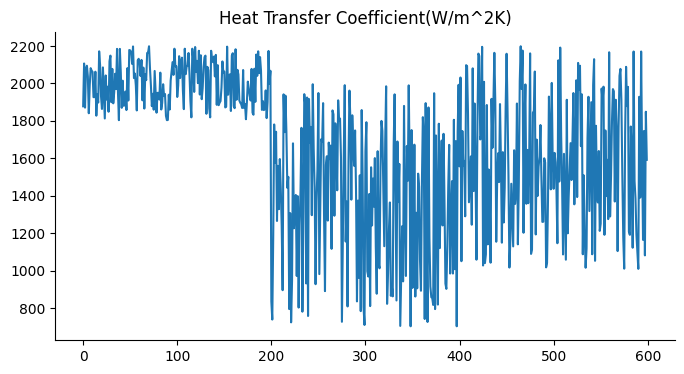

In [ ]:
from matplotlib import pyplot as plt
data['Heat Transfer Coefficient(W/m^2K)'].plot(kind='line', figsize=(8, 4), title='Heat Transfer Coefficient(W/m^2K)')
plt.gca().spines[['top', 'right']].set_visible(False)

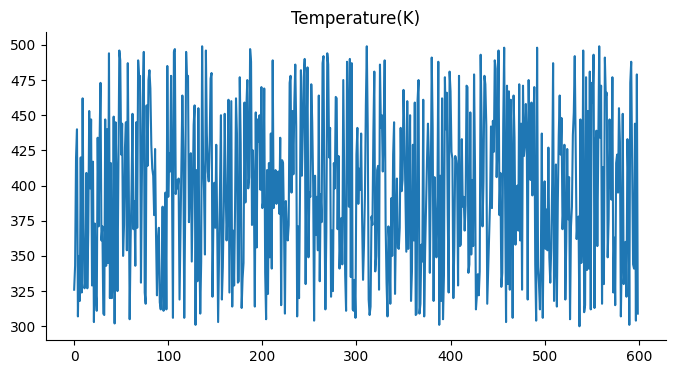

In [ ]:
from matplotlib import pyplot as plt
data['Temperature(K)'].plot(kind='line', figsize=(8, 4), title='Temperature(K)')
plt.gca().spines[['top', 'right']].set_visible(False)

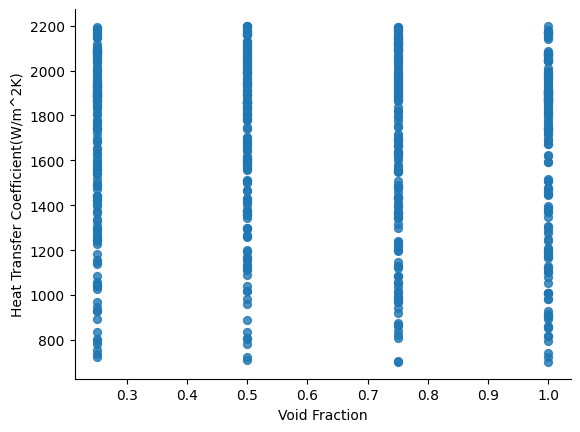

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Void Fraction', y='Heat Transfer Coefficient(W/m^2K)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

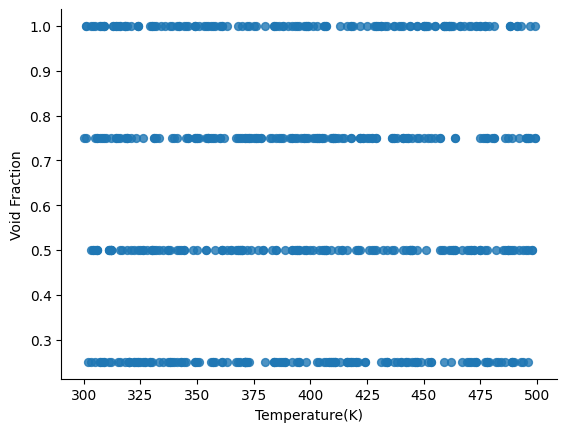

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Temperature(K)', y='Void Fraction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

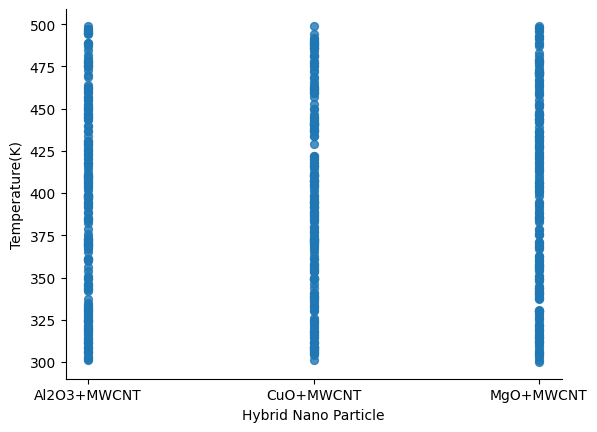

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Hybrid Nano Particle', y='Temperature(K)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head

<bound method NDFrame.head of     Hybrid Nano Particle  Temperature(K)  Void Fraction Base Fluid  \
0            Al2O3+MWCNT             326           0.25      Water   
1            Al2O3+MWCNT             343           0.25      Water   
2            Al2O3+MWCNT             420           0.25      Water   
3            Al2O3+MWCNT             440           0.25      Water   
4            Al2O3+MWCNT             307           0.25      Water   
..                   ...             ...            ...        ...   
595            MgO+MWCNT             341           1.00      Water   
596            MgO+MWCNT             444           1.00      Water   
597            MgO+MWCNT             304           1.00      Water   
598            MgO+MWCNT             479           1.00      Water   
599            MgO+MWCNT             309           1.00      Water   

     Heat Transfer Coefficient(W/m^2K)  
0                                 1878  
1                                 2107  
2     

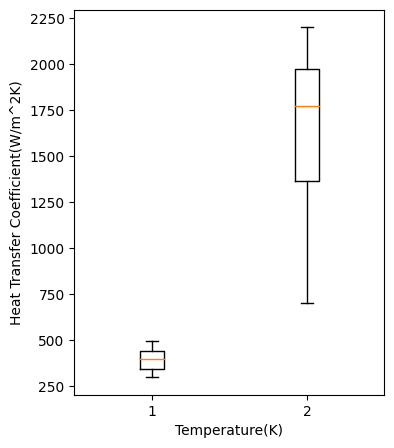

In [ ]:
plt.figure(figsize = (4,5))
plt.boxplot([df['Temperature(K)'], df['Heat Transfer Coefficient(W/m^2K)']])
plt.xlabel('Temperature(K)')
plt.ylabel('Heat Transfer Coefficient(W/m^2K)')
plt.show()

<Axes: xlabel='Void Fraction', ylabel='Heat Transfer Coefficient(W/m^2K)'>

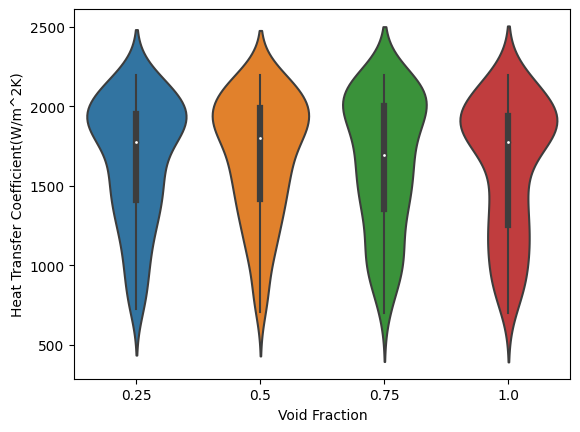

In [ ]:
sns.violinplot(data = df, x = df['Void Fraction'], y = df['Heat Transfer Coefficient(W/m^2K)'])

<Axes: xlabel='Temperature(K)', ylabel='Heat Transfer Coefficient(W/m^2K)'>

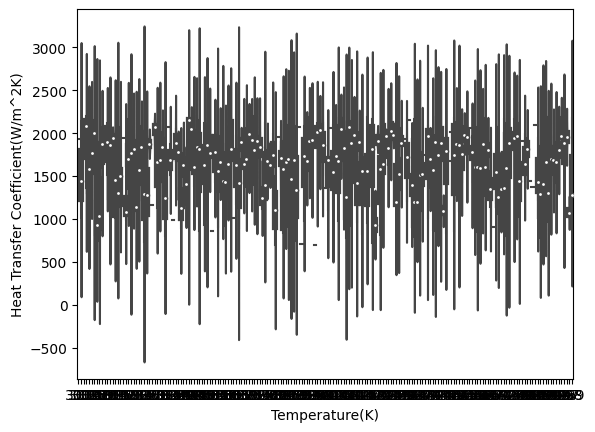

In [ ]:
sns.violinplot(data = df, x = df['Temperature(K)'], y = df['Heat Transfer Coefficient(W/m^2K)'])

<Axes: xlabel='Heat Transfer Coefficient(W/m^2K)'>

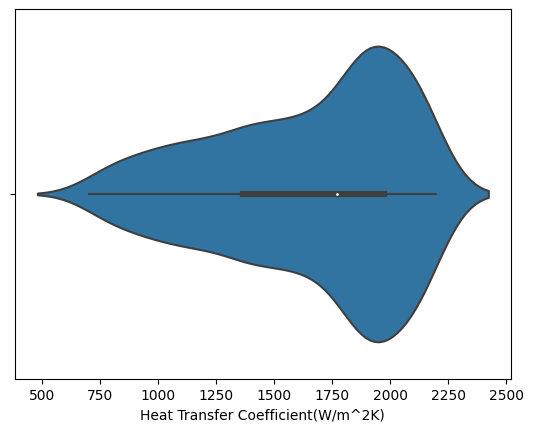

In [ ]:
sns.violinplot(data = df, x = df['Heat Transfer Coefficient(W/m^2K)'], density_norm = df['Hybrid Nano Particle'])

In [ ]:
import plotly.express as px
fig = px.bar(data_frame = df, x = 'Temperature(K)', y = 'Heat Transfer Coefficient(W/m^2K)', color = 'Hybrid Nano Particle')
fig.show()

In [ ]:
df.describe()

,Temperature(K),Void Fraction,Heat Transfer Coefficient(W/m^2K)
count,600.000000,600.000000,600.000000
mean,396.138333,0.625000,1653.678333
std,57.411259,0.279742,402.487572
min,300.000000,0.250000,702.000000
25%,345.750000,0.437500,1365.750000
50%,397.000000,0.625000,1772.000000
75%,444.000000,0.812500,1971.500000
max,499.000000,1.000000,2199.000000


from matplotlib import pyplot as plt
_df_0['Temperature(K)'].plot(kind='hist', bins=20, title='Temperature(K)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Void Fraction'].plot(kind='hist', bins=20, title='Void Fraction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Heat Transfer Coefficient(W/m^2K)'].plot(kind='hist', bins=20, title='Heat Transfer Coefficient(W/m^2K)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Temperature(K)', y='Void Fraction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Void Fraction', y='Heat Transfer Coefficient(W/m^2K)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Temperature(K)'].plot(kind='line', figsize=(8, 4), title='Temperature(K)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Void Fraction'].plot(kind='line', figsize=(8, 4), title='Void Fraction')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Heat Transfer Coefficient(W/m^2K)'].plot(kind='line', figsize=(8, 4), title='Heat Transfer Coefficient(W/m^2K)')
plt.gca().spines[['top', 'right']].set_visible(False)

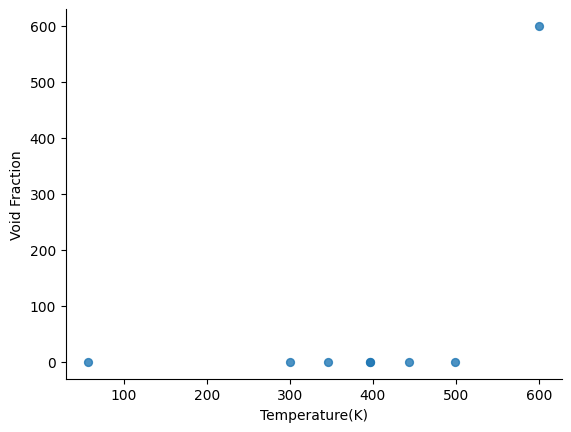

In [ ]:
from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Temperature(K)', y='Void Fraction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

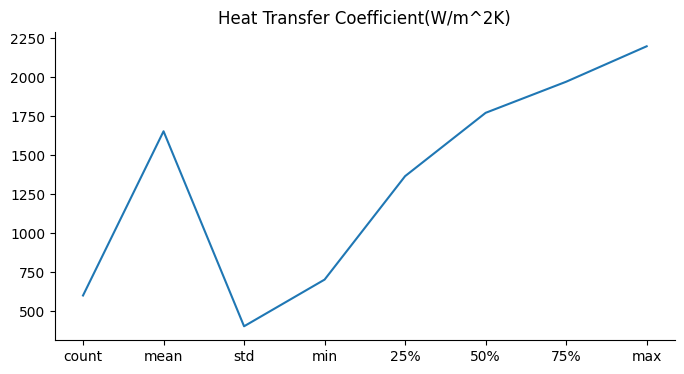

In [ ]:
from matplotlib import pyplot as plt
_df_7['Heat Transfer Coefficient(W/m^2K)'].plot(kind='line', figsize=(8, 4), title='Heat Transfer Coefficient(W/m^2K)')
plt.gca().spines[['top', 'right']].set_visible(False)

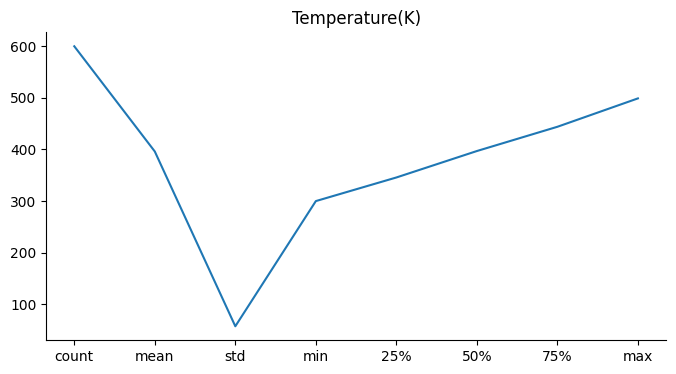

In [ ]:
from matplotlib import pyplot as plt
_df_5['Temperature(K)'].plot(kind='line', figsize=(8, 4), title='Temperature(K)')
plt.gca().spines[['top', 'right']].set_visible(False)

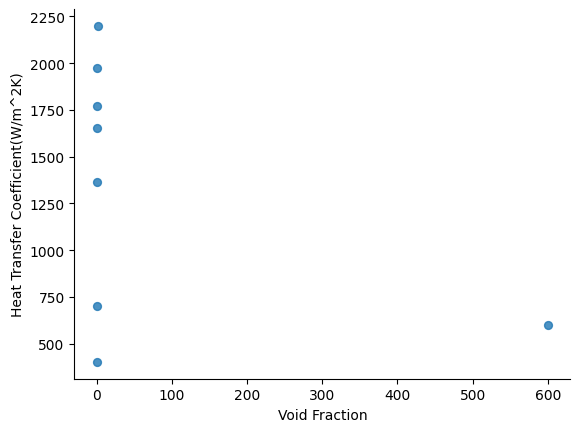

In [ ]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Void Fraction', y='Heat Transfer Coefficient(W/m^2K)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

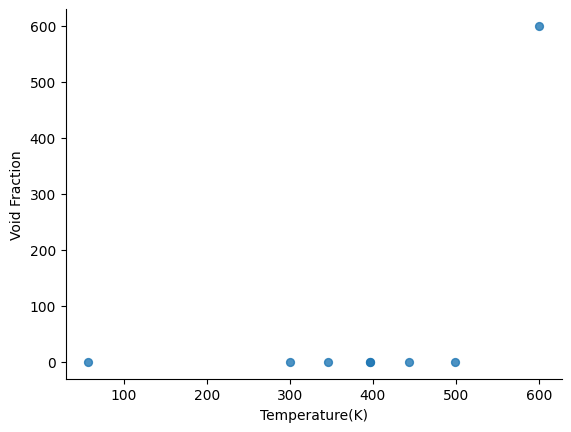

In [ ]:
from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Temperature(K)', y='Void Fraction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

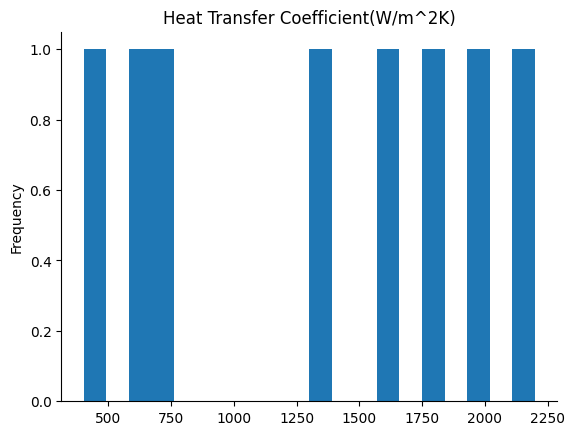

In [ ]:
from matplotlib import pyplot as plt
_df_2['Heat Transfer Coefficient(W/m^2K)'].plot(kind='hist', bins=20, title='Heat Transfer Coefficient(W/m^2K)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hybrid Nano Particle               600 non-null    object 
 1   Temperature(K)                     600 non-null    int64  
 2   Void Fraction                      600 non-null    float64
 3   Base Fluid                         600 non-null    object 
 4   Heat Transfer Coefficient(W/m^2K)  600 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 23.6+ KB


In [ ]:
df.count()

Hybrid Nano Particle                 600
Temperature(K)                       600
Void Fraction                        600
Base Fluid                           600
Heat Transfer Coefficient(W/m^2K)    600
dtype: int64

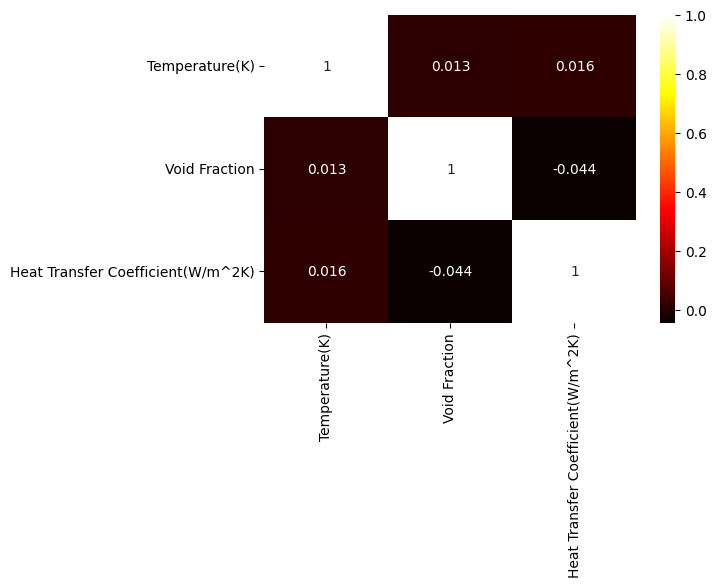

In [ ]:
# f, ax = plt.subplots(1, 1, figsize=(10,10))
plt.figure(figsize = (6,4))
ax = sns.heatmap(data = df.corr(), annot=True, cmap='hot')

In [ ]:
df.value_counts()

Hybrid Nano Particle  Temperature(K)  Void Fraction  Base Fluid  Heat Transfer Coefficient(W/m^2K)
Al2O3+MWCNT           301             0.75           Water       2141                                 1
CuO+MWCNT             490             0.25           Water       1651                                 1
                      491             1.00           Water       1449                                 1
                      492             0.50           Water       1856                                 1
                      494             0.50           Water       1657                                 1
                                                                                                     ..
                      301             1.00           Water       1447                                 1
                      304             0.50           Water       1895                                 1
                      305             0.25           Water       1576

# ***Feature Engineering(encoding included)***

In [ ]:
df.replace({'Hybrid Nano Particle' : {'Al2O3+MWCNT' : 1, 'MgO+MWCNT' : 2, 'CuO+MWCNT' : 3}}, inplace = True)


In [ ]:
df.replace({'Base Fluid' : {'Water' : 0}}, inplace = True)

In [ ]:
df

,Hybrid Nano Particle,Temperature(K),Void Fraction,Base Fluid,Heat Transfer Coefficient(W/m^2K)
0,1,326,0.25,0,1878
1,1,343,0.25,0,2107
2,1,420,0.25,0,1871
3,1,440,0.25,0,2080
4,1,307,0.25,0,2095
...,...,...,...,...,...
595,2,341,1.00,0,1164
596,2,444,1.00,0,1746
597,2,304,1.00,0,1081
598,2,479,1.00,0,1849


In [ ]:
df['Base Fluid'].value_counts()

0    600
Name: Base Fluid, dtype: int64

# ***Model Building***

In [ ]:
X = df.drop('Heat Transfer Coefficient(W/m^2K)', axis = 1)
Y = df['Heat Transfer Coefficient(W/m^2K)']

In [ ]:
#splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 6)

1. *Linear Regression*

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
X_test_prediction1 = lin_model.predict(X_test)

In [ ]:
r2_score_lin = r2_score(Y_test, X_test_prediction1)

In [ ]:
r2_score_lin

0.4560210635541676

In [ ]:
mean_squared_error_lin = mean_squared_error(Y_test, X_test_prediction1)

In [ ]:
mean_squared_error_lin

86348.10042984242

In [ ]:
mean_absolute_error_lin = mean_absolute_error(Y_test, X_test_prediction1)

In [ ]:
mean_absolute_error_lin

233.3317730588277

*2. SVM for Regression*

In [ ]:
svr_model = SVR()
svr_model.fit(X_train, Y_train)

SVR()

In [ ]:
X_test_prediction2 = svr_model.predict(X_test)

In [ ]:
r2_score_svr = r2_score(Y_test, X_test_prediction2)

In [ ]:
r2_score_svr

-0.13126229046360338

In [ ]:
mean_squared_error_svr = mean_squared_error(Y_test, X_test_prediction2)

In [ ]:
mean_squared_error_svr

179570.09605494473

In [ ]:
mean_absolute_error_svr = mean_absolute_error(Y_test, X_test_prediction2)

In [ ]:
mean_absolute_error_svr

330.53311749503314

*3. Random Forest Regressor*

In [ ]:
rfr_model = RandomForestRegressor()

In [ ]:
rfr_model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
X_test_prediction3 = rfr_model.predict(X_test)

In [ ]:
r2_score_rfr = r2_score(Y_test, X_test_prediction3)

In [ ]:
r2_score_rfr

0.2677123108429176

In [ ]:
mean_squared_error_rfr = mean_squared_error(Y_test, X_test_prediction3)

In [ ]:
mean_squared_error_rfr

116239.15319222912

In [ ]:
mean_absolute_error_rfr = mean_absolute_error(Y_test, X_test_prediction3)

In [ ]:
mean_absolute_error_rfr

255.8062417328042

*4. XgBoost Regressor*

In [ ]:
gbr_model = GradientBoostingRegressor()

In [ ]:
gbr_model.fit(X_train, Y_train)

GradientBoostingRegressor()

In [ ]:
X_test_prediction4 = gbr_model.predict(X_test)

In [ ]:
r2_score_gbr = r2_score(Y_test, X_test_prediction4)

In [ ]:
r2_score_gbr

0.41189087213913433

In [ ]:
mean_squared_error_gbr = mean_squared_error(Y_test, X_test_prediction4)

In [ ]:
mean_squared_error_gbr

93353.0742348767

In [ ]:
mean_absolute_error_gbr = mean_absolute_error(Y_test, X_test_prediction4)

In [ ]:
mean_absolute_error_gbr

235.05634550120348

*5. Ridge Regression*

In [ ]:
r_model = Ridge()

In [ ]:
r_model.fit(X_train, Y_train)

Ridge()

In [ ]:
X_test_prediction5 = r_model.predict(X_test)

In [ ]:
r2_score_r = r2_score(Y_test, X_test_prediction5)

In [ ]:
r2_score_r

0.4559620120965099

In [ ]:
mean_squared_error_r = mean_squared_error(Y_test, X_test_prediction5)

In [ ]:
mean_squared_error_r

86357.47391998097

In [ ]:
mean_absolute_error_r = mean_absolute_error(Y_test, X_test_prediction5)

In [ ]:
mean_absolute_error_r

233.29598308008983

# ***Creating a table to show the performance of the various models***

In [ ]:
# models = ['Linear-R', 'SVR', 'RFR', 'XGBoost-R', 'Ridge-R']
# r2score = [r2_score_lin, r2_score_svr, r2_score_rfr, r2_score_gbr, r2_score_r]
# rmse = [mean_squared_error_lin, mean_squared_error_svr, mean_squared_error_rfr, mean_squared_error_gbr, mean_squared_error_r]
# mae = [mean_absolute_error_lin, mean_absolute_error_svr, mean_absolute_error_rfr, mean_absolute_error_gbr, mean_absolute_error_r]

# performance = pd.DataFrame(list(zip(models, r2score, rmse, mae)), columns = ['Models', 'R2_Score', 'RMSE', 'MAE'])

In [ ]:
# performance

,Models,R2_Score,RMSE,MAE
0,Linear-R,0.456021,86348.100430,233.331773
1,SVR,-0.131262,179570.096055,330.533117
2,RFR,0.267712,116239.153192,255.806242
3,XGBoost-R,0.411891,93353.074235,235.056346
4,Ridge-R,0.455962,86357.473920,233.295983


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate random data
X = np.random.randn(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define and train machine learning models
models = {}

# Support vector regressor
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
models['Support Vector Regressor'] = svr

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
models['Linear Regression'] = lr

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
models['Ridge Regression'] = ridge

# XGBoost regressor
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
models['XGBoost Regressor'] = xgb_reg

# Random forest regressor
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
models['Random Forest Regressor'] = rf_reg

# Evaluate models on test data
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Create and print DataFrame
performance = pd.DataFrame(results).T



In [ ]:
performance

,RMSE,MAE,R2
Support Vector Regressor,1.740167,1.438219,0.806858
Linear Regression,1.079565,0.885441,0.925665
Ridge Regression,1.091155,0.900572,0.924061
XGBoost Regressor,1.578953,1.315348,0.840987
Random Forest Regressor,1.670170,1.298338,0.822084


from matplotlib import pyplot as plt
performance['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance.plot(kind='scatter', x='MAE', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
performance['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
performance['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

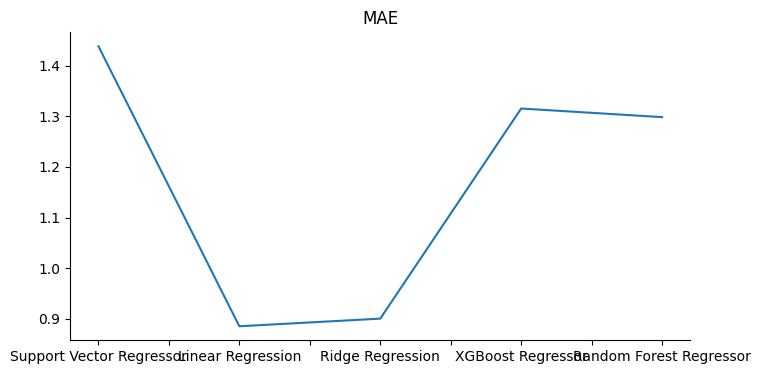

In [ ]:
from matplotlib import pyplot as plt
performance['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

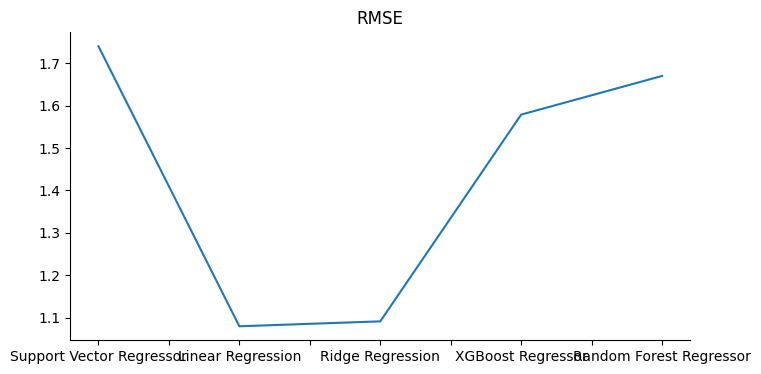

In [ ]:
from matplotlib import pyplot as plt
performance['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

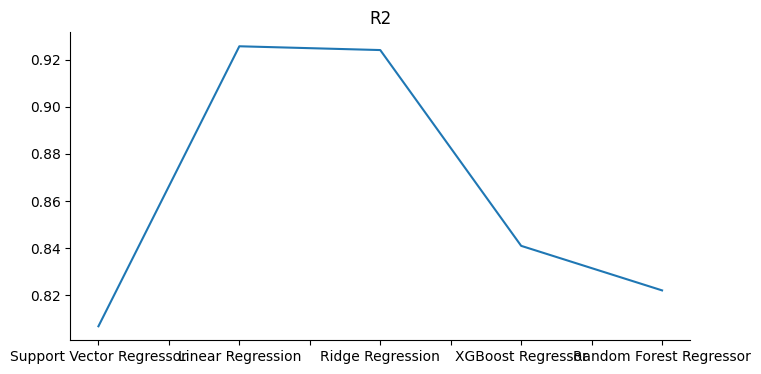

In [ ]:
from matplotlib import pyplot as plt
performance['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

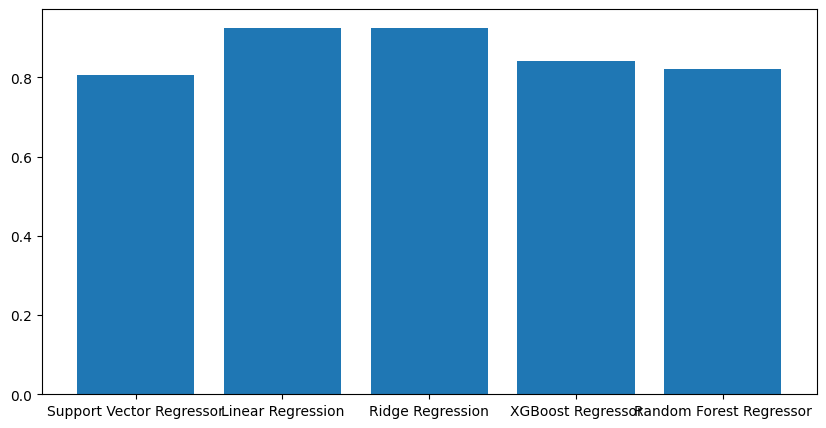

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(performance.index, performance['R2'])
plt.show()